# PACKAGES AND LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
import missingno as msno
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.preprocessing import scale
from sklearn.model_selection import ShuffleSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from lightgbm import LGBMRegressor, LGBMClassifier
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
filterwarnings("ignore", category=DeprecationWarning) 
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning) 

# HISTORY

* NOR - Total number of pupils on roll
* PNORG - Percentage of girls on roll
* PNORB - Percentage of boys on roll
* School_Phase - Phase of School (Type)
* Total_Teachers - Total Number of Teachers
* Total_Teaching_Assistants - Number of Teaching Assistants (Headcount)
* Total_Instructor - Total_Teachers + Total_Teaching_Assistants
* School_Support - Total Number of Non Classroom-based School Support Staff, Excluding Auxiliary Staff
* Full_Time_Teachers - Percentage of full time teachers
* Pupil_Teacher_Ratio - Students per teacher
* GFTE - Gross full time employment salary for teachers for one year
* GPS_AVERAGE - Grammer Score Average
* MAT_AVERAGE - Math Score Average
* READ_AVERAGE - Reading Score Average


# Data Source

In [3]:
SchoolData = pd.read_csv("../input/schooldata/schoolpredict.csv")
data = SchoolData.copy() # to protect main data

In [4]:
data.rename(columns={"Total_Teaching_Assistants ":"Teaching_Assistants"},inplace=True)
data.rename(columns={"School_0ort":"School_Support"},inplace=True)

In [5]:
data.drop("Pupil_Teacher_Ratio",axis=1,inplace=True)
data.drop("Full_Time_Teachers",axis=1,inplace=True)

In [6]:
data["Total_Instructor"] = data["Total_Teachers"] + data["Teaching_Assistants"]
data["Pupil_Teacher_Ratio"] = data["NOR"] / data["Total_Instructor"]

In [7]:
data.drop("Total_Teachers",axis=1,inplace=True)
data.drop("Teaching_Assistants",axis=1,inplace=True)

In [8]:
data["GPS_AVERAGE"] = data["GPS_AVERAGE"].astype(float)

In [9]:
data["MAT_AVERAGE"] = data["MAT_AVERAGE"].astype(float)

In [10]:
data["READ_AVERAGE"] = data["READ_AVERAGE"].astype(float)

In [11]:
data[["GPS_AVERAGE",
      "MAT_AVERAGE","READ_AVERAGE"]] = data[["GPS_AVERAGE",
                                             "MAT_AVERAGE","READ_AVERAGE"]].replace(0,np.NaN)

# EXPLORATORY DATA ANALYSIS

In [12]:
print(data.head())

   NOR  PNORG  PNORB School_Phase     GFTE  School_Support  GPS_AVERAGE  \
0  285   49.5   50.5      Primary  45421.0            30.0        111.0   
1  350   53.4   46.6      Primary  47681.0             7.0        107.0   
2  410   49.0   51.0      Primary  47719.0             3.0        109.0   
3  405   44.2   55.8      Primary  43671.0             9.0        113.0   
4  427   49.2   50.8      Primary  43629.0            11.0        102.0   

   MAT_AVERAGE  READ_AVERAGE  Total_Instructor  Pupil_Teacher_Ratio  
0        110.0         110.0              42.0             6.785714  
1        103.0         106.0              29.0            12.068966  
2        108.0         108.0              40.0            10.250000  
3        110.0         109.0              45.0             9.000000  
4        100.0          99.0              41.0            10.414634  


In [13]:
print(data.shape)

(16508, 11)


In [14]:
print(data.columns)

Index(['NOR', 'PNORG', 'PNORB', 'School_Phase', 'GFTE', 'School_Support',
       'GPS_AVERAGE', 'MAT_AVERAGE', 'READ_AVERAGE', 'Total_Instructor',
       'Pupil_Teacher_Ratio'],
      dtype='object')


In [15]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16508 entries, 0 to 16507
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOR                  16508 non-null  int64  
 1   PNORG                16508 non-null  float64
 2   PNORB                16508 non-null  float64
 3   School_Phase         16508 non-null  object 
 4   GFTE                 16462 non-null  float64
 5   School_Support       16464 non-null  float64
 6   GPS_AVERAGE          15206 non-null  float64
 7   MAT_AVERAGE          15222 non-null  float64
 8   READ_AVERAGE         15222 non-null  float64
 9   Total_Instructor     16464 non-null  float64
 10  Pupil_Teacher_Ratio  16464 non-null  float64
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB
None


In [16]:
print(data.describe().T)

                       count          mean          std      min  \
NOR                  16508.0    414.013206   346.244102      6.0   
PNORG                16508.0     49.104380     8.085835      0.0   
PNORB                16508.0     50.895996     8.085837      0.0   
GFTE                 16462.0  38788.366237  3416.455452  23445.0   
School_Support       16464.0      8.727648     9.645741      0.0   
GPS_AVERAGE          15206.0    106.047547     3.502173     80.0   
MAT_AVERAGE          15222.0    104.783274     3.164978     81.0   
READ_AVERAGE         15222.0    104.419327     3.174537     80.0   
Total_Instructor     16464.0     41.058613    28.586241      3.0   
Pupil_Teacher_Ratio  16464.0      9.626396     2.839525      1.5   

                              25%           50%           75%           max  
NOR                    203.000000    306.000000    472.000000   2833.000000  
PNORG                   46.900000     49.000000     51.200000    100.000000  
PNORB            

In [17]:
print(data.groupby(["Total_Instructor"])["NOR"].mean())

Total_Instructor
3.0       181.750000
4.0        31.866667
5.0        42.685714
6.0        54.647059
7.0        64.365591
            ...     
223.0    2500.000000
226.0    2087.000000
232.0    2152.000000
243.0    1812.000000
256.0    1795.000000
Name: NOR, Length: 195, dtype: float64


In [18]:
print(data.where(data["NOR"] < 200).value_counts().sum())

3541


In [19]:
print(data.where(data["Total_Instructor"] > 100).value_counts().sum())

813


In [20]:
print(data.where(data["Total_Instructor"] < 5).value_counts().sum())

14


In [21]:
print(data.where(data["GFTE"] > 40000).value_counts().sum())

4707


In [22]:
print(data.where(data["GFTE"] > data["GFTE"].mean()).value_counts().sum())

6970


In [23]:
print(data.duplicated().value_counts())

False    16508
dtype: int64


In [24]:
print(data.isnull().all())

NOR                    False
PNORG                  False
PNORB                  False
School_Phase           False
GFTE                   False
School_Support         False
GPS_AVERAGE            False
MAT_AVERAGE            False
READ_AVERAGE           False
Total_Instructor       False
Pupil_Teacher_Ratio    False
dtype: bool


In [25]:
print(data.isnull().sum())

NOR                       0
PNORG                     0
PNORB                     0
School_Phase              0
GFTE                     46
School_Support           44
GPS_AVERAGE            1302
MAT_AVERAGE            1286
READ_AVERAGE           1286
Total_Instructor         44
Pupil_Teacher_Ratio      44
dtype: int64


# MISSING VALUES

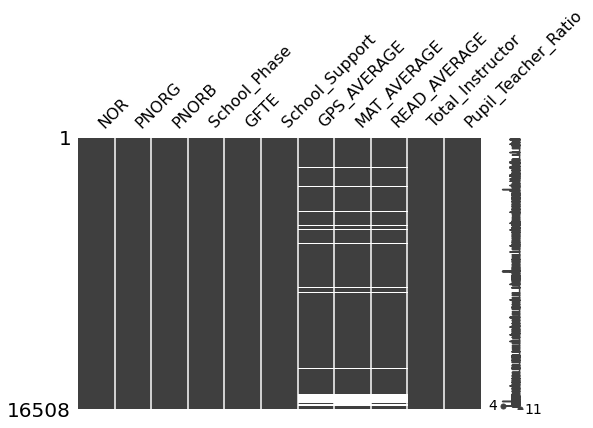

In [26]:
msno.matrix(data,figsize=(8,5))
plt.show()

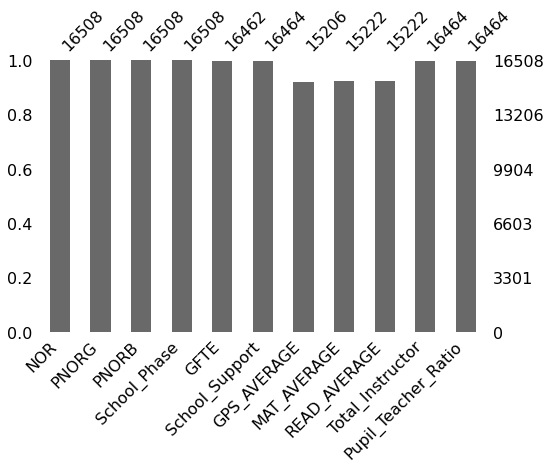

In [27]:
msno.bar(data,figsize=(8,5))
plt.show()

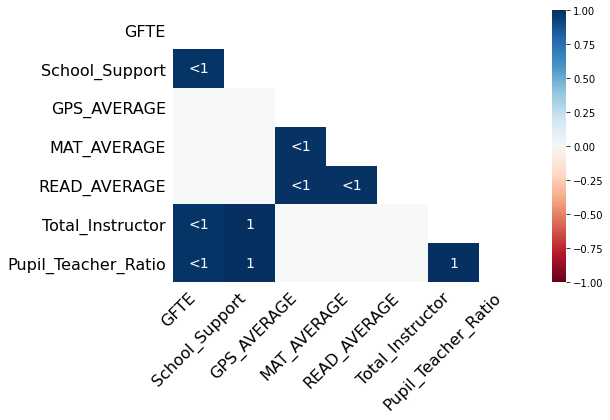

In [28]:
msno.heatmap(data,figsize=(8,5))
plt.show()

In [29]:
data["GFTE"].fillna(data.groupby("School_Phase")["GFTE"].transform("mean"), inplace=True)
data["School_Support"].fillna(data.groupby("School_Phase")["School_Support"].transform("mean"), inplace=True)
data["Total_Instructor"].fillna(data.groupby("School_Phase")["Total_Instructor"].transform("mean"), inplace=True)
data["Pupil_Teacher_Ratio"].fillna(data.groupby("School_Phase")["Pupil_Teacher_Ratio"].transform("mean"), inplace=True)
data["GPS_AVERAGE"].fillna(data.groupby("School_Phase")["GPS_AVERAGE"].transform("mean"), inplace=True)
data["MAT_AVERAGE"].fillna(data.groupby("School_Phase")["MAT_AVERAGE"].transform("mean"), inplace=True)
data["READ_AVERAGE"].fillna(data.groupby("School_Phase")["READ_AVERAGE"].transform("mean"), inplace=True)
# filling missing values based on School_Phase
# School_Phase is the best option to fill

In [30]:
data["Success_Mean"] = ((data["GPS_AVERAGE"] + data["MAT_AVERAGE"] + data["READ_AVERAGE"]) / 3) / data["Pupil_Teacher_Ratio"]
# we will use this new features as target
# this formula is to prevent over-fitting

In [31]:
print(data.head())

   NOR  PNORG  PNORB School_Phase     GFTE  School_Support  GPS_AVERAGE  \
0  285   49.5   50.5      Primary  45421.0            30.0        111.0   
1  350   53.4   46.6      Primary  47681.0             7.0        107.0   
2  410   49.0   51.0      Primary  47719.0             3.0        109.0   
3  405   44.2   55.8      Primary  43671.0             9.0        113.0   
4  427   49.2   50.8      Primary  43629.0            11.0        102.0   

   MAT_AVERAGE  READ_AVERAGE  Total_Instructor  Pupil_Teacher_Ratio  \
0        110.0         110.0              42.0             6.785714   
1        103.0         106.0              29.0            12.068966   
2        108.0         108.0              40.0            10.250000   
3        110.0         109.0              45.0             9.000000   
4        100.0          99.0              41.0            10.414634   

   Success_Mean  
0     16.259649  
1      8.727619  
2     10.569106  
3     12.296296  
4      9.633880  


In [32]:
print(data.isnull().sum())

NOR                    0
PNORG                  0
PNORB                  0
School_Phase           0
GFTE                   0
School_Support         0
GPS_AVERAGE            0
MAT_AVERAGE            0
READ_AVERAGE           0
Total_Instructor       0
Pupil_Teacher_Ratio    0
Success_Mean           0
dtype: int64


In [33]:
df = data.select_dtypes(include=["float64","int64","int32"]) # for corr and outlier

In [34]:
print(df.corr())

                          NOR     PNORG     PNORB      GFTE  School_Support  \
NOR                  1.000000  0.036252 -0.036275  0.213846        0.867999   
PNORG                0.036252  1.000000 -1.000000  0.008230        0.037140   
PNORB               -0.036275 -1.000000  1.000000 -0.008237       -0.037158   
GFTE                 0.213846  0.008230 -0.008237  1.000000        0.225524   
School_Support       0.867999  0.037140 -0.037158  0.225524        1.000000   
GPS_AVERAGE          0.013057 -0.005024  0.005027 -0.000291       -0.008839   
MAT_AVERAGE          0.014850  0.000628 -0.000628  0.004655       -0.006611   
READ_AVERAGE         0.011073  0.000833 -0.000829 -0.008746       -0.006139   
Total_Instructor     0.946756  0.028829 -0.028850  0.188860        0.830933   
Pupil_Teacher_Ratio  0.441515  0.012062 -0.012084  0.143394        0.329970   
Success_Mean        -0.434143 -0.016137  0.016161 -0.117071       -0.322098   

                     GPS_AVERAGE  MAT_AVERAGE  READ

# OUTLIER

In [35]:
DataForA = df.copy() # to protect main data

In [36]:
clf = LocalOutlierFactor()
clf.fit_predict(df)

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
score = clf.negative_outlier_factor_

In [38]:
sortedScore = np.sort(score)
print(sortedScore[0:70])

[-3.99738535 -3.48685065 -3.31097258 -3.2422122  -3.11131257 -3.0772565
 -3.04042535 -2.95406928 -2.93035157 -2.86198519 -2.77376546 -2.61984901
 -2.59244464 -2.58378315 -2.49533277 -2.41220969 -2.38115351 -2.35578442
 -2.33185054 -2.27882854 -2.26662597 -2.23697169 -2.23617164 -2.20380084
 -2.19360316 -2.18686117 -2.17199542 -2.17062696 -2.15032454 -2.11823372
 -2.11404452 -2.09383361 -2.08745928 -2.07619479 -2.05356697 -2.02832318
 -2.02286866 -1.99484786 -1.97929742 -1.96079461 -1.95279809 -1.91982378
 -1.89725487 -1.89308478 -1.86549723 -1.86346898 -1.85848999 -1.83110756
 -1.82875305 -1.81761926 -1.81108203 -1.80918122 -1.79221515 -1.78784883
 -1.78058424 -1.76394376 -1.75860439 -1.75575993 -1.74920137 -1.73584653
 -1.73536224 -1.73319052 -1.73129582 -1.72772151 -1.69663239 -1.69660495
 -1.69387982 -1.6918958  -1.6791598  -1.67300495]


In [39]:
point = sortedScore[3]

In [40]:
print(f"Outlier Point -- > {point} ")
print("---"*20)
print("Outlier Row -- >\n",DataForA[score==point])

Outlier Point -- > -3.2422121966027184 
------------------------------------------------------------
Outlier Row -- >
        NOR  PNORG  PNORB     GFTE  School_Support  GPS_AVERAGE  MAT_AVERAGE  \
13595  332   51.2   48.8  23772.0            12.0        107.0        105.0   

       READ_AVERAGE  Total_Instructor  Pupil_Teacher_Ratio  Success_Mean  
13595         106.0              55.0             6.036364     17.560241  


In [41]:
totaloutlier = DataForA < point
print(DataForA[totaloutlier].any())

NOR                    False
PNORG                  False
PNORB                  False
GFTE                   False
School_Support         False
GPS_AVERAGE            False
MAT_AVERAGE            False
READ_AVERAGE           False
Total_Instructor       False
Pupil_Teacher_Ratio    False
Success_Mean           False
dtype: bool


# ENCODE 

In [42]:
encode = LabelEncoder()

In [43]:
print(data["School_Phase"].value_counts())

Primary                    13681
Secondary                   2607
All through                  136
Middle deemed secondary       54
16 plus                       21
Middle deemed primary          9
Name: School_Phase, dtype: int64


In [44]:
data["School_Phase"] = encode.fit_transform(data["School_Phase"])

In [45]:
print(data["School_Phase"].value_counts())

4    13681
5     2607
1      136
3       54
0       21
2        9
Name: School_Phase, dtype: int64


* Primary                    4
* Secondary                  5
* All through                1
* Middle deemed secondary    3
* 16 plus                    0
* Middle deemed primary      2

# CORRELATION - COVARIANCE - NORMALITY - HOMOGENEITY

#### Correlation

In [46]:
corrPearson = data.corr(method="pearson")
corrSpearman = data.corr(method="spearman")

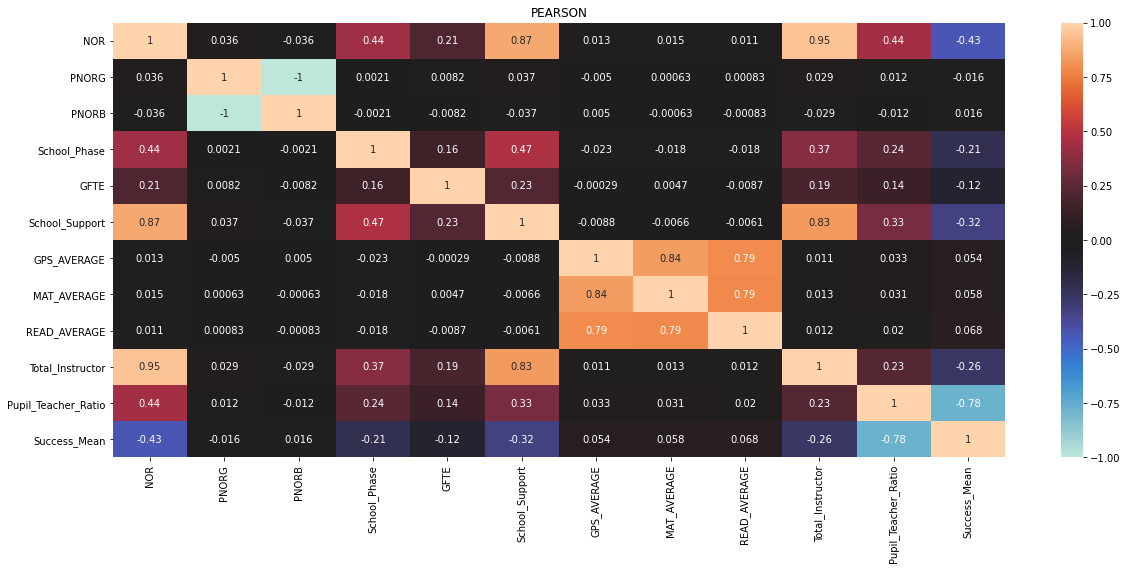

In [47]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrPearson,annot=True,vmin=-1,center=0,vmax=1)
plt.title("PEARSON")
plt.show()

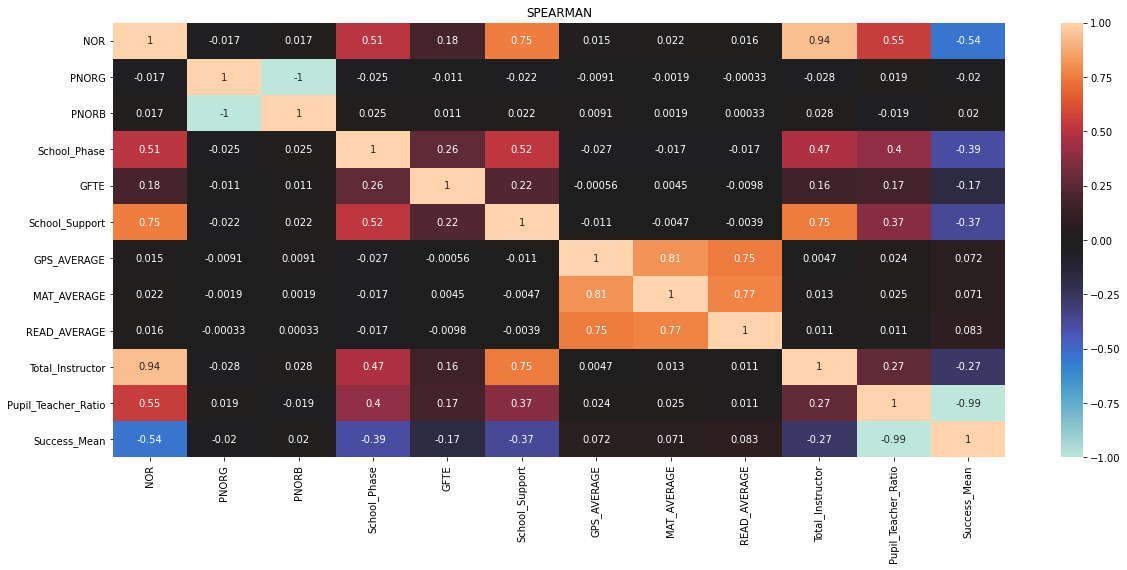

In [48]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(corrSpearman,annot=True,vmin=-1,center=0,vmax=1)
plt.title("SPEARMAN")
plt.show()

#### Covariance

In [49]:
covv = data.cov()

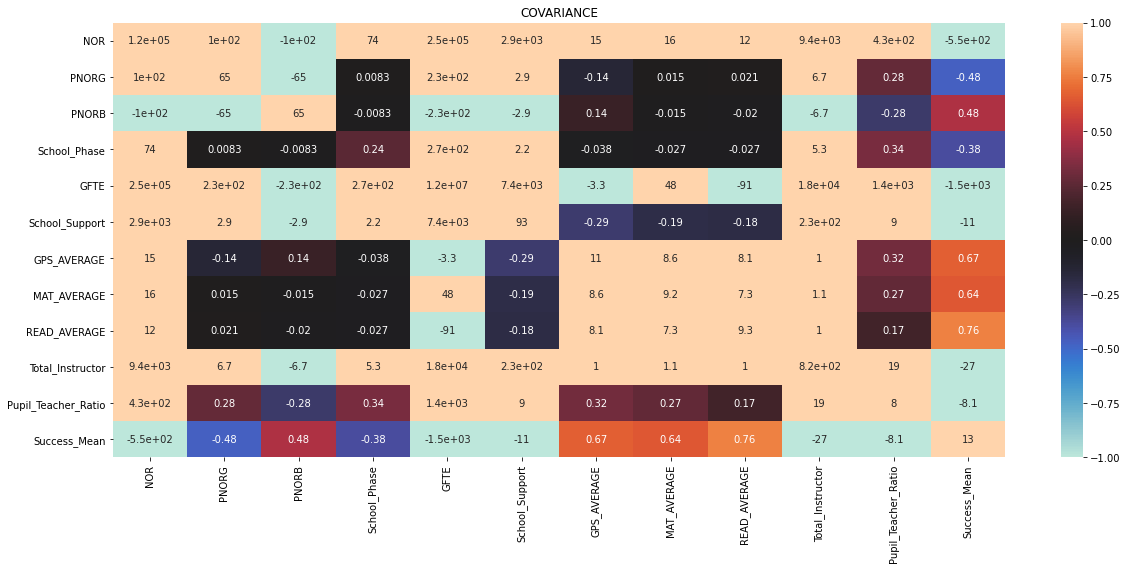

In [50]:
figure = plt.figure(figsize=(20,8))
sns.heatmap(covv,annot=True,vmin=-1,center=0,vmax=1)
plt.title("COVARIANCE")
plt.show()

#### Normality

In [51]:
for i in data.columns:
    print("---"*30)
    print(i)
    print("%.4f - %.4f" % shapiro(data[i]))

------------------------------------------------------------------------------------------
NOR
0.7948 - 0.0000
------------------------------------------------------------------------------------------
PNORG
0.5845 - 0.0000
------------------------------------------------------------------------------------------
PNORB
0.5845 - 0.0000
------------------------------------------------------------------------------------------
School_Phase
0.4541 - 0.0000
------------------------------------------------------------------------------------------
GFTE
0.9690 - 0.0000
------------------------------------------------------------------------------------------
School_Support
0.7128 - 0.0000
------------------------------------------------------------------------------------------
GPS_AVERAGE
0.9523 - 0.0000
------------------------------------------------------------------------------------------
MAT_AVERAGE
0.9114 - 0.0000
-----------------------------------------------------------------------

#### Homogeneity

In [52]:
print("%.3f - %.3f" % levene(data["Pupil_Teacher_Ratio"],data["NOR"]))
print("%.3f - %.3f" % levene(data["Pupil_Teacher_Ratio"],data["School_Phase"]))
print("%.3f - %.3f" % levene(data["Pupil_Teacher_Ratio"],data["GFTE"]))
print("%.3f - %.3f" % levene(data["Pupil_Teacher_Ratio"],data["School_Support"]))

10747.391 - 0.000
10556.289 - 0.000
20077.242 - 0.000
3136.317 - 0.000


# VISUALIZATION

#### GENERAL HISTOGAM

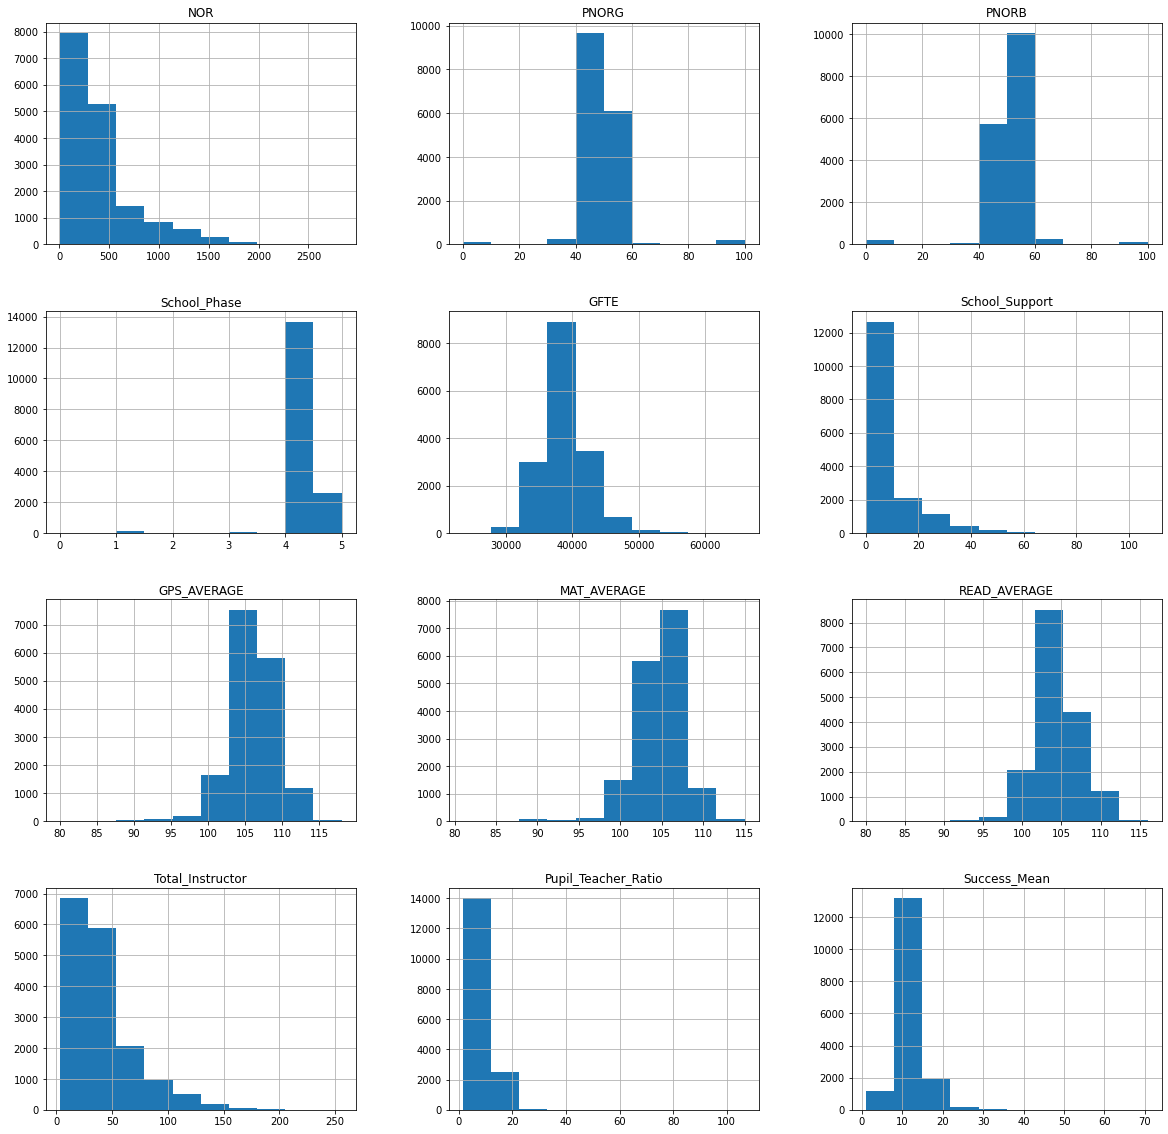

In [53]:
data.hist(figsize=(20,20))
plt.show()

#### BOX PLOT

In [54]:
dataV = data.copy() # to protect main data
dataV["School_Phase"] = pd.Categorical(dataV["School_Phase"])

comparison between School_Phase and Pupil_Teacher_Ratio

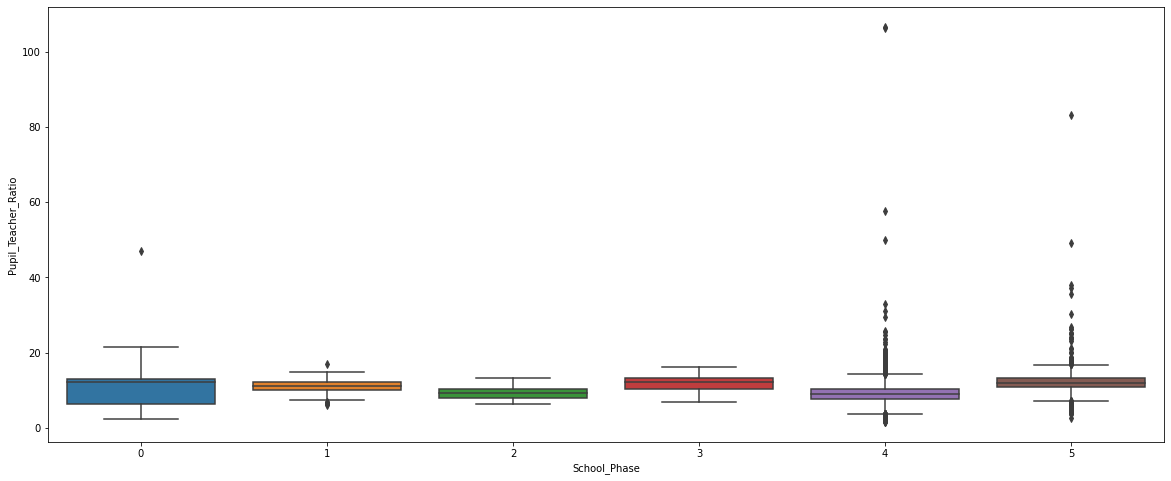

In [55]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="School_Phase",y="Pupil_Teacher_Ratio",data=dataV)
plt.show()

comparison between School_Phase and GFTE

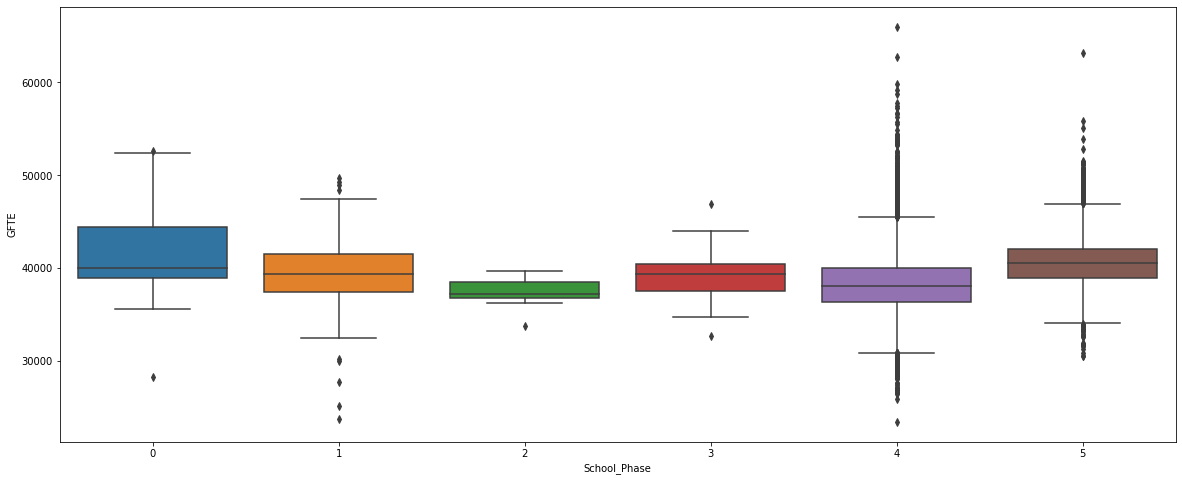

In [56]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="School_Phase",y="GFTE",data=dataV)
plt.show()

comparison between School_Phase and NOR

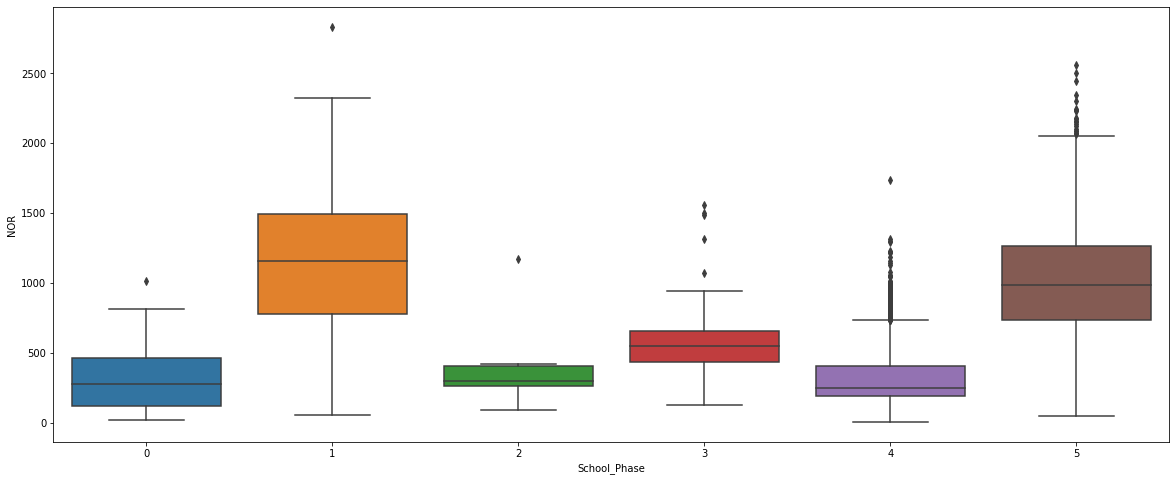

In [57]:
figure = plt.figure(figsize=(20,8))
sns.boxplot(x="School_Phase",y="NOR",data=dataV)
plt.show()

#### BARPLOT

comparison between School_Phase and Pupil_Teacher_Ratio

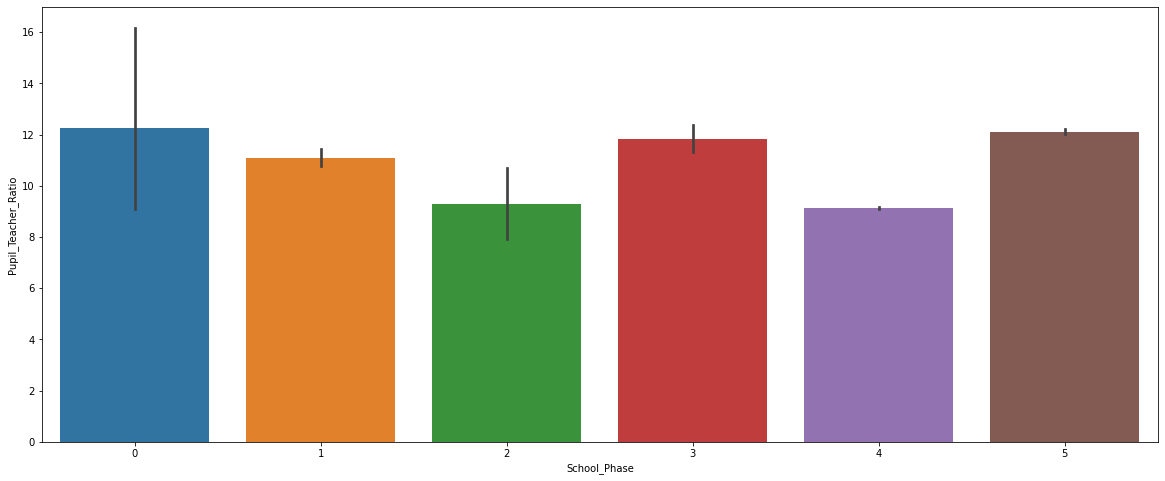

In [58]:
figure = plt.figure(figsize=(20,8))
sns.barplot(x="School_Phase",y="Pupil_Teacher_Ratio",data=dataV)
plt.show()

#### JOINTGRID & KDEPLOT

comparison between School_Phase and Success_Mean

<Figure size 1440x576 with 0 Axes>

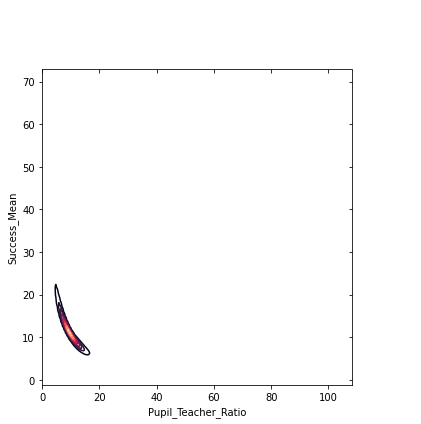

In [59]:
figure = plt.figure(figsize=(20,8))
g = sns.JointGrid(data=data, x="Pupil_Teacher_Ratio", y="Success_Mean", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

comparison between NOR and Success_Mean

<Figure size 1440x576 with 0 Axes>

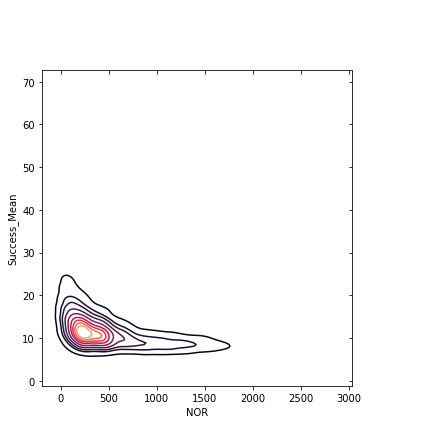

In [60]:
figure = plt.figure(figsize=(20,8))
g = sns.JointGrid(data=data, x="NOR", y="Success_Mean", space=0)
g.plot_joint(sns.kdeplot,cmap="rocket")
plt.show()

#### SCATTERPLOT

comparison between Pupil_Teacher_Ratio and NOR based on School_Phase

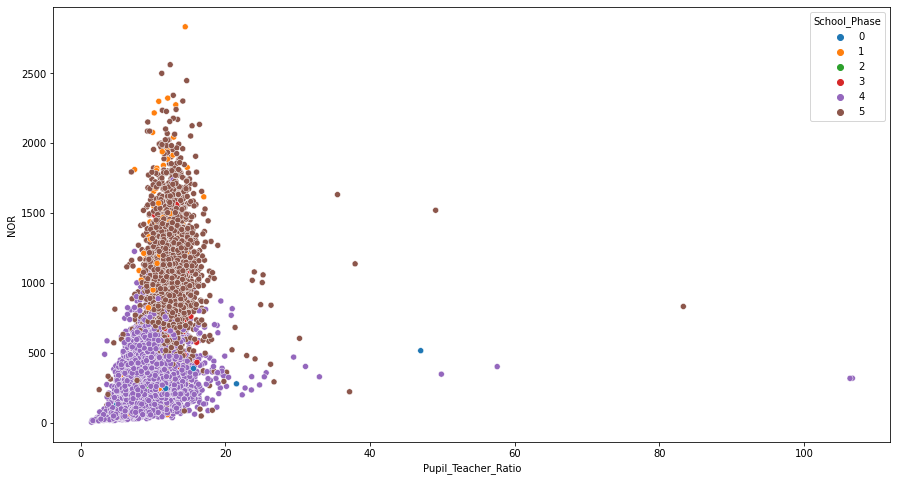

In [61]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Pupil_Teacher_Ratio",y="NOR",hue="School_Phase",data=dataV)
plt.show()

comparison between Total_Instructor and NOR based on School_Phase

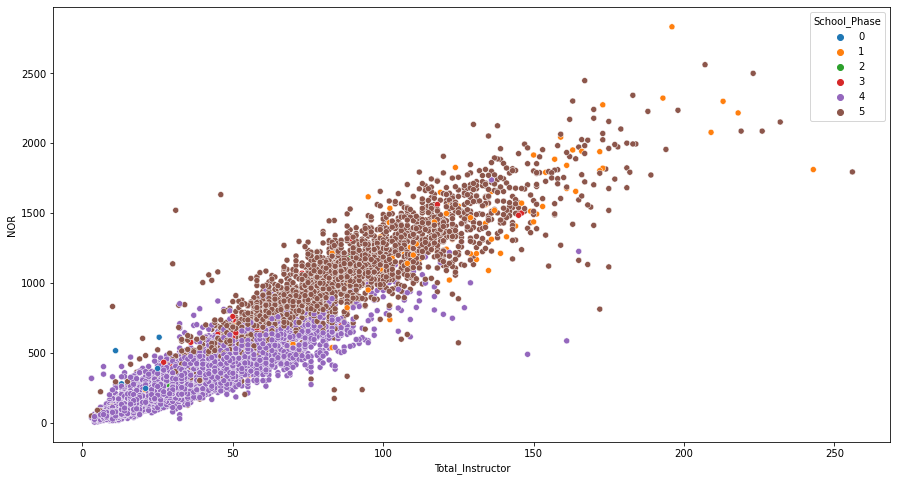

In [62]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Total_Instructor",y="NOR",hue="School_Phase",data=dataV)
plt.show()

comparison between Total_Instructor and GFTE based on School_Phase

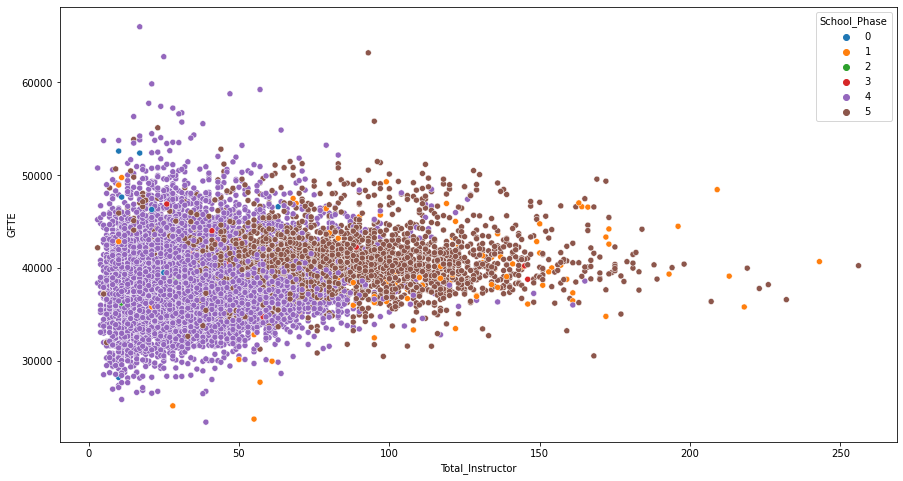

In [63]:
figure = plt.figure(figsize=(15,8))
sns.scatterplot(x="Total_Instructor",y="GFTE",hue="School_Phase",data=dataV)
plt.show()

#### JOINPLOT

comparison between Total_Instructor and NOR based on School_Phase

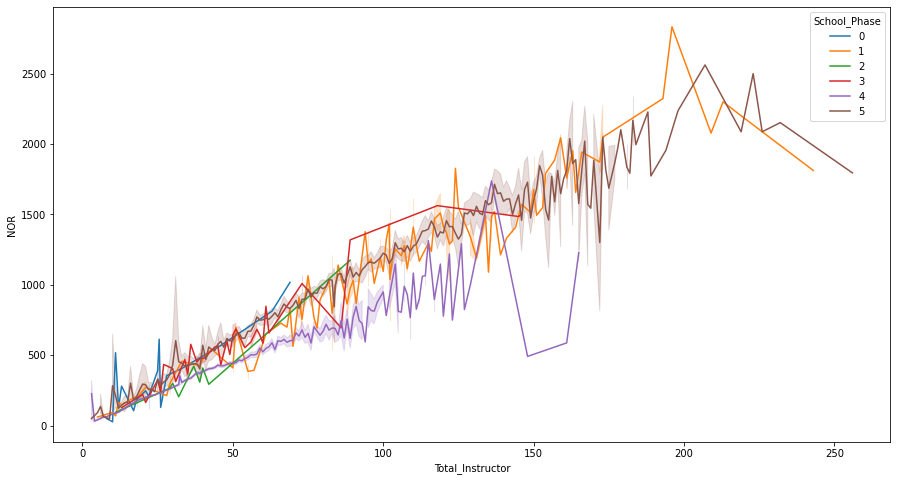

In [64]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Total_Instructor",y="NOR",hue="School_Phase",data=dataV)
plt.show()

comparison between Total_Instructor and Success_Mean based on School_Phase

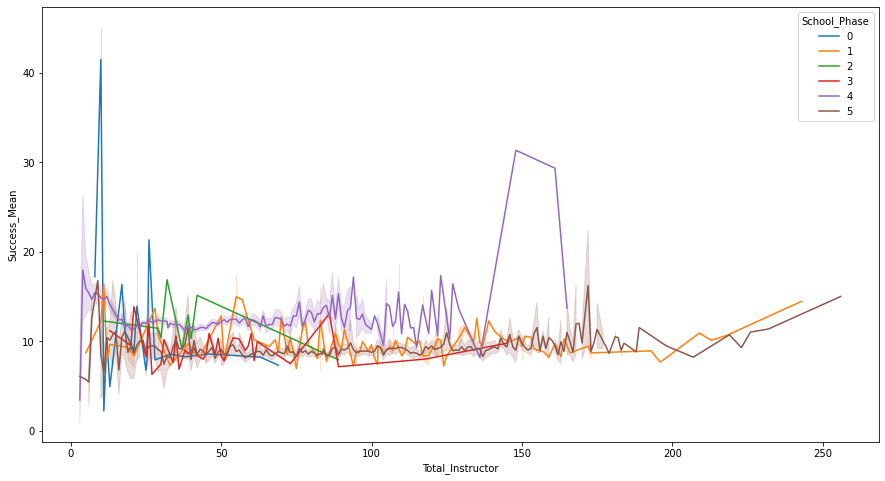

In [65]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Total_Instructor",y="Success_Mean",hue="School_Phase",data=dataV)
plt.show()

comparison between Total_Instructor and Success_Mean

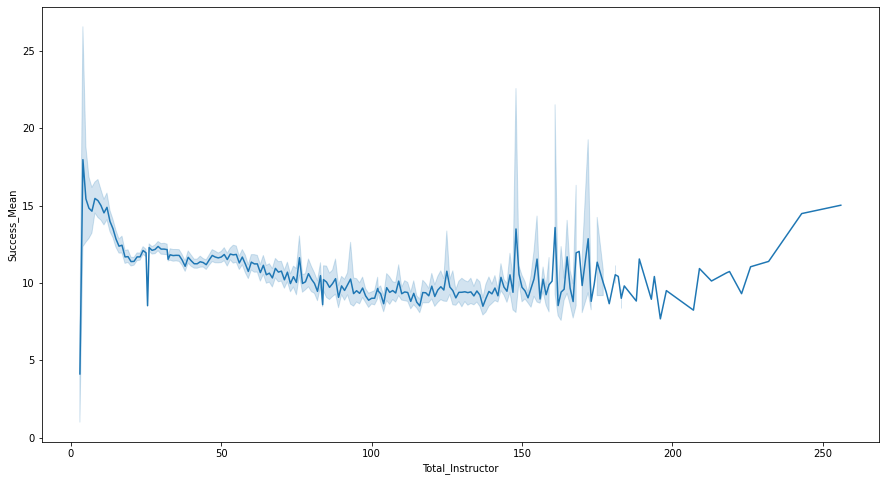

In [66]:
figure = plt.figure(figsize=(15,8))
sns.lineplot(x="Total_Instructor",y="Success_Mean",data=dataV)
plt.show()

comparison Total_Instructor based on School_Phase

#### HISTPLOT

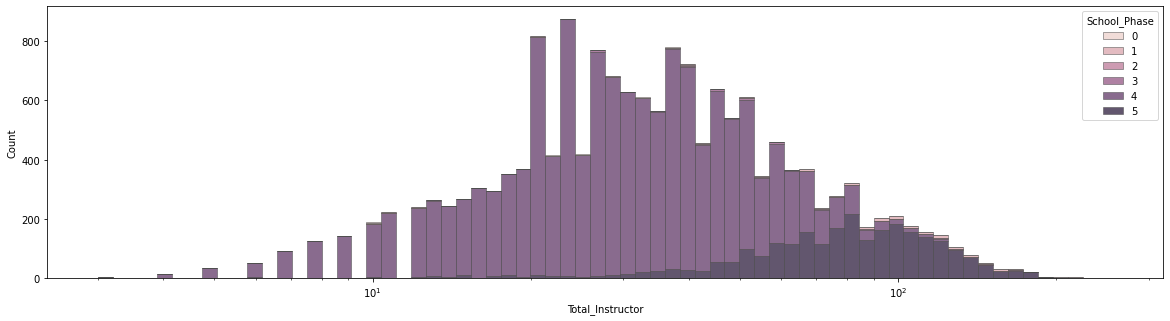

In [67]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="Total_Instructor", hue="School_Phase",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

comparison Pupil_Teacher_Ratio based on School_Phase

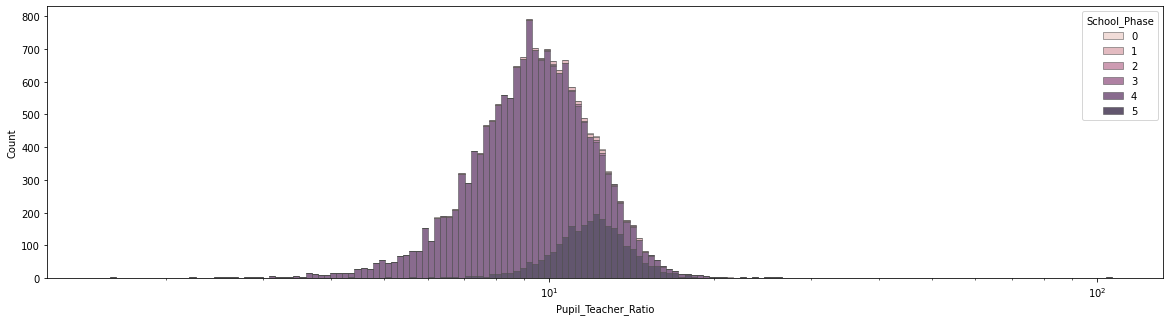

In [68]:
figure = plt.figure(figsize=(20,5))
sns.histplot(
    data,
    x="Pupil_Teacher_Ratio", hue="School_Phase",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
plt.show()

comparison between Pupil_Teacher_Ratio and NOR

#### JOINPLOT

<Figure size 1440x576 with 0 Axes>

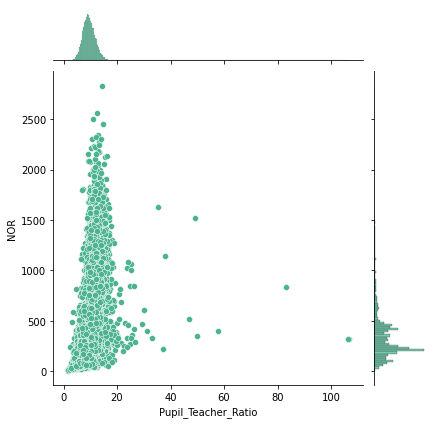

In [69]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Pupil_Teacher_Ratio",y="NOR", color="#4CB391",data=data)
plt.show()

comparison between Pupil_Teacher_Ratio and School_Support

<Figure size 1440x576 with 0 Axes>

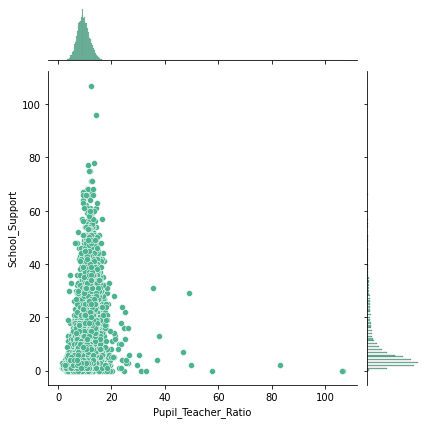

In [70]:
figure = plt.figure(figsize=(20,8))
sns.jointplot(x="Pupil_Teacher_Ratio",y="School_Support", color="#4CB391",data=data)
plt.show()

comparison between Pupil_Teacher_Ratio and Pupil_Teacher_Ratio mean based on NOR

* BAD and GOOD label


As the number of students increases, the number of students per teacher increases

#### DISTPLOT

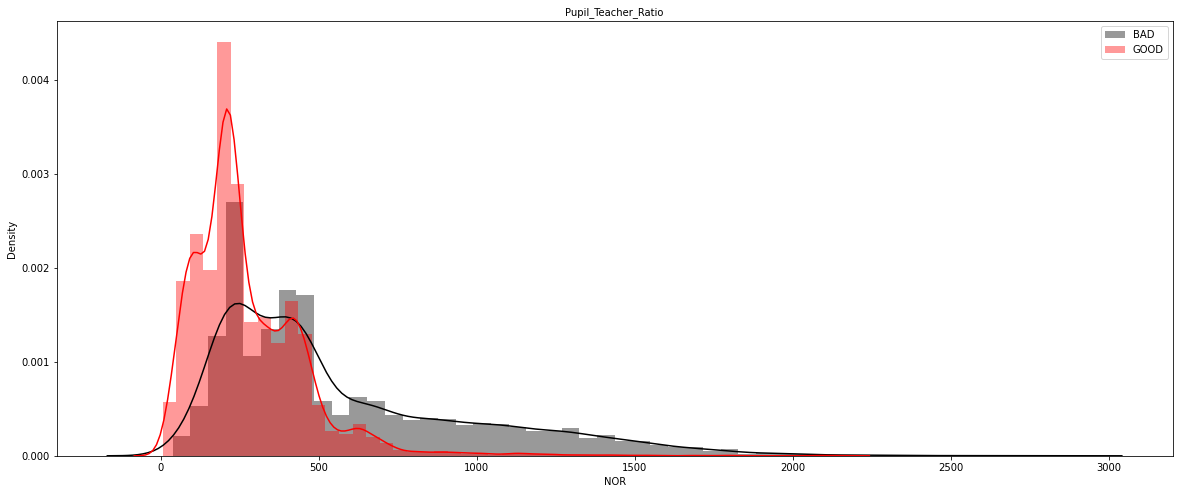

In [71]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Pupil_Teacher_Ratio'] > data['Pupil_Teacher_Ratio'].mean()]["NOR"], 
             color='black',label='BAD') 
sns.distplot(data[data['Pupil_Teacher_Ratio'] < data['Pupil_Teacher_Ratio'].mean()]["NOR"], 
             color='red',label='GOOD')
plt.title('Pupil_Teacher_Ratio', fontsize=10)
plt.legend()


comparison between Pupil_Teacher_Ratio and Pupil_Teacher_Ratio mean based on School_Phase

* BAD and GOOD label

Primary 4 / 
Secondary 5

* At 5, the number of students per teacher is much higher than that of 4.

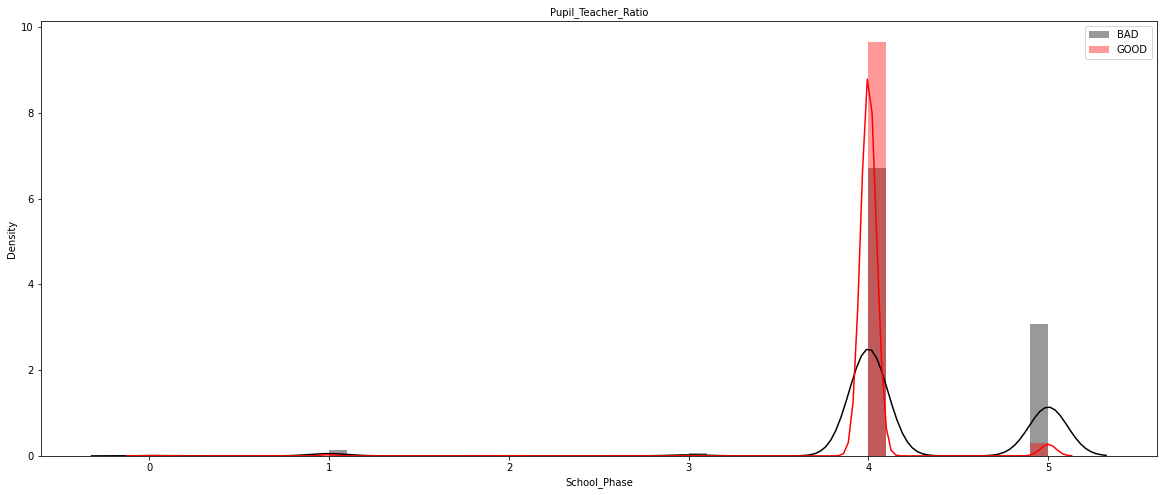

In [72]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Pupil_Teacher_Ratio'] > data['Pupil_Teacher_Ratio'].mean()]["School_Phase"],
             color='black',label='BAD') 
sns.distplot(data[data['Pupil_Teacher_Ratio'] < data['Pupil_Teacher_Ratio'].mean()]["School_Phase"],
             color='red',label='GOOD')
plt.title('Pupil_Teacher_Ratio', fontsize=10)
plt.legend()

comparison between Pupil_Teacher_Ratio and Pupil_Teacher_Ratio mean based on GFTE

* BAD and GOOD label

There is no big difference alone

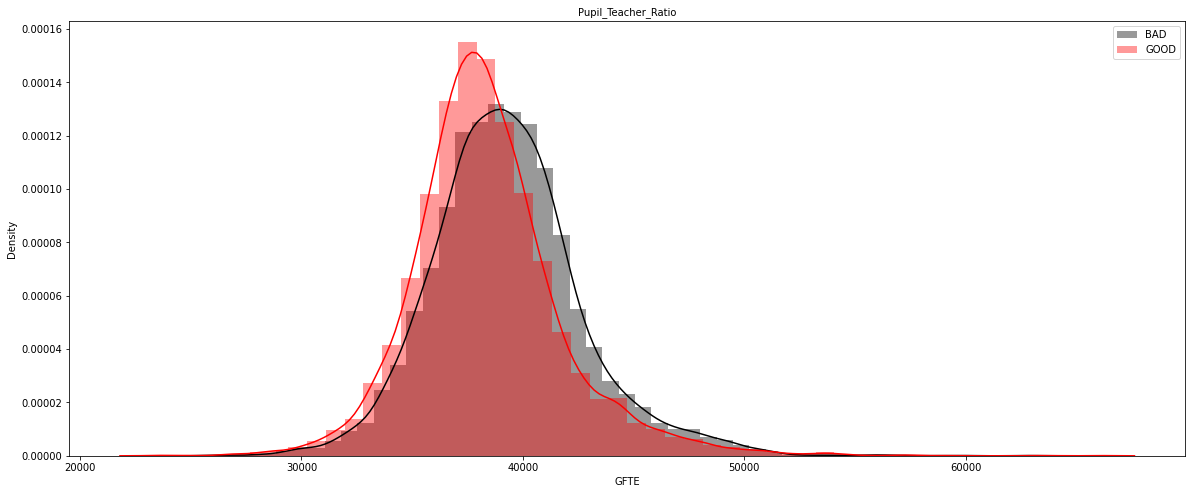

In [73]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Pupil_Teacher_Ratio'] > data['Pupil_Teacher_Ratio'].mean()]["GFTE"],
             color='black',label='BAD') 
sns.distplot(data[data['Pupil_Teacher_Ratio'] < data['Pupil_Teacher_Ratio'].mean()]["GFTE"],
             color='red',label='GOOD')
plt.title('Pupil_Teacher_Ratio', fontsize=10)
plt.legend()

comparison between Pupil_Teacher_Ratio and Pupil_Teacher_Ratio mean based on Success_Mean

* BAD and GOOD label

There is no big difference alone

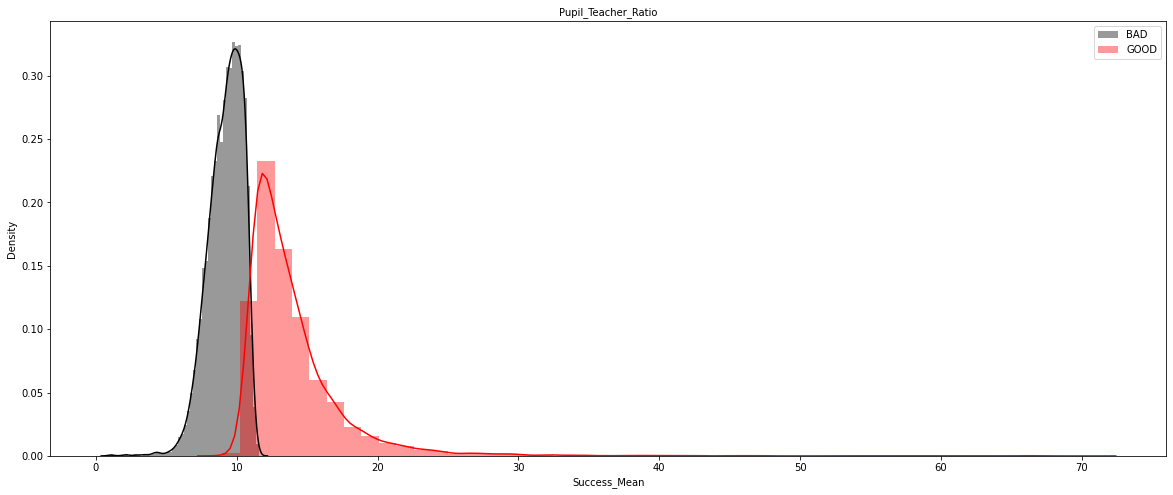

In [74]:
figure = plt.figure(figsize=(20,8))
sns.distplot(data[data['Pupil_Teacher_Ratio'] > data['Pupil_Teacher_Ratio'].mean()]["Success_Mean"],
             color='black',label='BAD') 
sns.distplot(data[data['Pupil_Teacher_Ratio'] < data['Pupil_Teacher_Ratio'].mean()]["Success_Mean"],
             color='red',label='GOOD')
plt.title('Pupil_Teacher_Ratio', fontsize=10)
plt.legend()

#### 3D

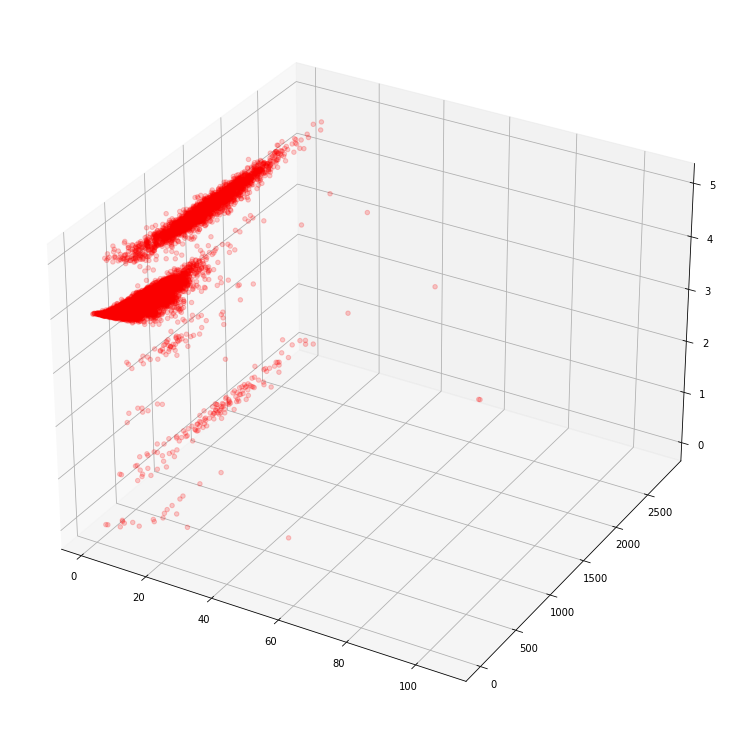

In [75]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Pupil_Teacher_Ratio"], data["NOR"], data["School_Phase"], c="red", s=20, alpha=0.2)
plt.show()

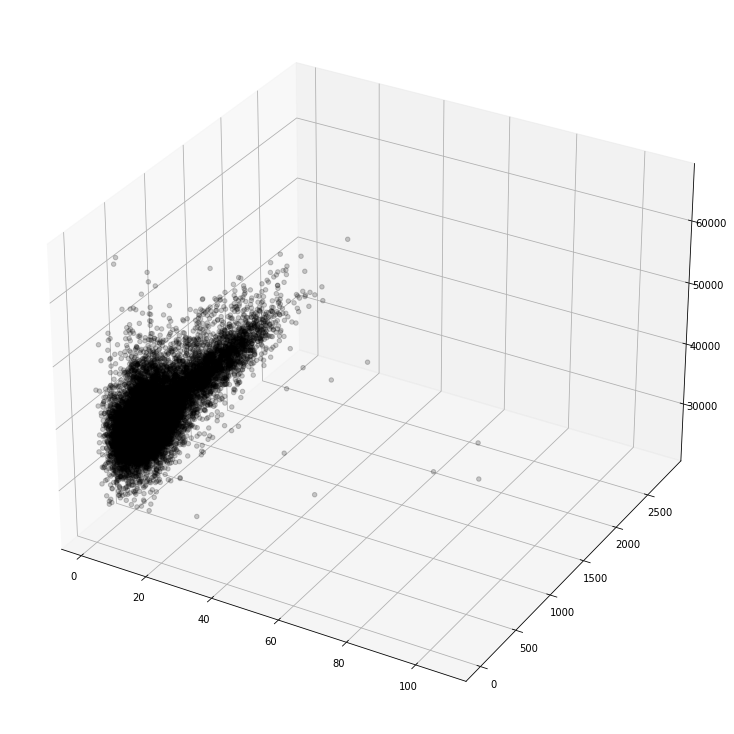

In [76]:
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
ax.scatter(data["Pupil_Teacher_Ratio"], data["NOR"], data["GFTE"], c="black", s=20, alpha=0.2)
plt.show()

#### PAIRGRID

<Figure size 1440x360 with 0 Axes>

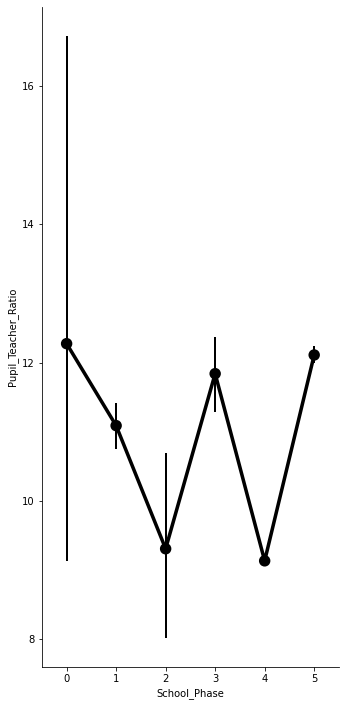

In [77]:
fig = plt.figure(figsize=(20,5))
sns.PairGrid(dataV, y_vars="Pupil_Teacher_Ratio",
                 x_vars=["School_Phase"],height=10,aspect=.5).map(sns.pointplot, scale=1.3, errwidth=2, color="black")
plt.show()

<Figure size 1440x360 with 0 Axes>

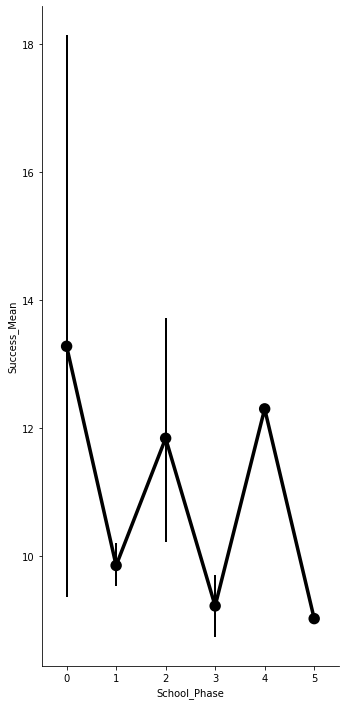

In [78]:
fig = plt.figure(figsize=(20,5))
sns.PairGrid(dataV, y_vars="Success_Mean",
                 x_vars=["School_Phase"],height=10,aspect=.5).map(sns.pointplot, scale=1.3, errwidth=2, color="black")
plt.show()

# SPECIAL CORRELATIONS

In [79]:
print(data["Pupil_Teacher_Ratio"].corr(data["School_Support"],method="spearman"))

0.3690758907521579


In [80]:
print(data["Pupil_Teacher_Ratio"].corr(data["NOR"],method="spearman"))

0.5497919148664343


In [81]:
print(data["Pupil_Teacher_Ratio"].corr(data["School_Phase"],method="spearman"))

0.3956648581675194


In [82]:
print(data["Pupil_Teacher_Ratio"].corr(data["GFTE"],method="spearman"))

0.17454443318030338


In [83]:
print(data["Pupil_Teacher_Ratio"].corr(data["Success_Mean"],method="spearman"))

-0.9925557660325574


# PREDICTION MODELS

In [84]:
x = data.drop(["GFTE","School_Support",
               "PNORG","PNORB",'GPS_AVERAGE','MAT_AVERAGE',
               "Total_Instructor",'READ_AVERAGE',"Success_Mean"],axis=1)
y = data["Success_Mean"]

In [85]:
print(data["Success_Mean"].mean())
# lower than average, we will classify education as okay
# higher othan average, we will classify education as bad

11.751663326897202


In [86]:
print(data["Success_Mean"].max())
# As the value approaches the maximum, the quality of education increases

70.66666666666667


In [87]:
print(data["Success_Mean"].min())
# As the value approaches the minimum, the quality of education increases

0.987460815047022


In [88]:
import statsmodels.stats.api as sms

In [89]:
print(sms.DescrStatsW(data["Success_Mean"]).tconfint_mean())

(11.69611722174927, 11.807209432045047)


In [90]:
print(x.columns)
# features to be used for estimation

Index(['NOR', 'School_Phase', 'Pupil_Teacher_Ratio'], dtype='object')


In [91]:
xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=0.2,random_state=42)
# for test and train

#### MODELS

In [92]:
lm = LinearRegression().fit(xTrain,yTrain)
pls = PLSRegression().fit(xTrain,yTrain)
ridge = Ridge().fit(xTrain,yTrain)
lasso = Lasso().fit(xTrain,yTrain)
elasticnet = ElasticNet().fit(xTrain,yTrain)
knnr = KNeighborsRegressor().fit(xTrain,yTrain)
cartr = DecisionTreeRegressor(random_state=42).fit(xTrain,yTrain)
baggr = BaggingRegressor(random_state=42,bootstrap_features=True,verbose=False).fit(xTrain,yTrain)
rfr = RandomForestRegressor(random_state=42,verbose=False).fit(xTrain,yTrain)
gbmr = GradientBoostingRegressor(verbose=False).fit(xTrain,yTrain)
xgbr = XGBRegressor().fit(xTrain,yTrain)
lgbmr = LGBMRegressor().fit(xTrain,yTrain)
catbr = CatBoostRegressor(verbose=False).fit(xTrain,yTrain)

In [93]:
models = [lm,pls,ridge,lasso,elasticnet,knnr,
         cartr,baggr,rfr,gbmr,xgbr,lgbmr,catbr]

#### ACCURACY AND MEAN SQUARED ERROR

In [94]:
for model in models:
    name = model.__class__.__name__
    R2CV = cross_val_score(model,xTest,yTest,cv=10,scoring="r2").mean()
    error = -cross_val_score(model,xTest,yTest,cv=10,scoring="neg_mean_squared_error").mean()
    print(name + ": ")
    print("-" * 10)
    # first is R2
    print(R2CV)
    # second is Mean Squared Error
    print(np.sqrt(error))
    print("-" * 30)

LinearRegression: 
----------
0.7378928031595481
1.9698699540544555
------------------------------
PLSRegression: 
----------
0.7319796810156569
1.9902437898415164
------------------------------
Ridge: 
----------
0.7378963282545191
1.9698651738126614
------------------------------
Lasso: 
----------
0.7264485224295856
2.020553843859672
------------------------------
ElasticNet: 
----------
0.7261989582519757
2.021324592111237
------------------------------
KNeighborsRegressor: 
----------
0.7969252647525881
1.7183970990399076
------------------------------
DecisionTreeRegressor: 
----------
0.9722318112793233
0.6074777113883661
------------------------------
BaggingRegressor: 
----------
0.9139676170445462
1.0740416432761049
------------------------------
RandomForestRegressor: 
----------
0.9793592270077974
0.5592567870283845
------------------------------
GradientBoostingRegressor: 
----------
0.9865011838585216
0.4075237866592501
------------------------------
XGBRegressor: 
------

Best is GradientBoostingRegressor -- > 0.98

In [95]:
data.to_csv("newschool.csv",index=False)

# TRYING MODEL

In [96]:
print(data.head())

   NOR  PNORG  PNORB  School_Phase     GFTE  School_Support  GPS_AVERAGE  \
0  285   49.5   50.5             4  45421.0            30.0        111.0   
1  350   53.4   46.6             4  47681.0             7.0        107.0   
2  410   49.0   51.0             4  47719.0             3.0        109.0   
3  405   44.2   55.8             4  43671.0             9.0        113.0   
4  427   49.2   50.8             4  43629.0            11.0        102.0   

   MAT_AVERAGE  READ_AVERAGE  Total_Instructor  Pupil_Teacher_Ratio  \
0        110.0         110.0              42.0             6.785714   
1        103.0         106.0              29.0            12.068966   
2        108.0         108.0              40.0            10.250000   
3        110.0         109.0              45.0             9.000000   
4        100.0          99.0              41.0            10.414634   

   Success_Mean  
0     16.259649  
1      8.727619  
2     10.569106  
3     12.296296  
4      9.633880  


'NOR', 'School_Phase', 'Pupil_Teacher_Ratio'

In [97]:
newfeaturesvalue = [[200], [4], [3]]
newfeaturesvalue = pd.DataFrame(newfeaturesvalue).T

In [98]:
predict = gbmr.predict(newfeaturesvalue)
print(predict)

[33.22596906]
